In [9]:
%%HTML
<style>
   div#notebook-container    { width: 95%; }
   div#menubar-container     { width: 65%; }
   div#maintoolbar-container { width: 99%; }
</style>

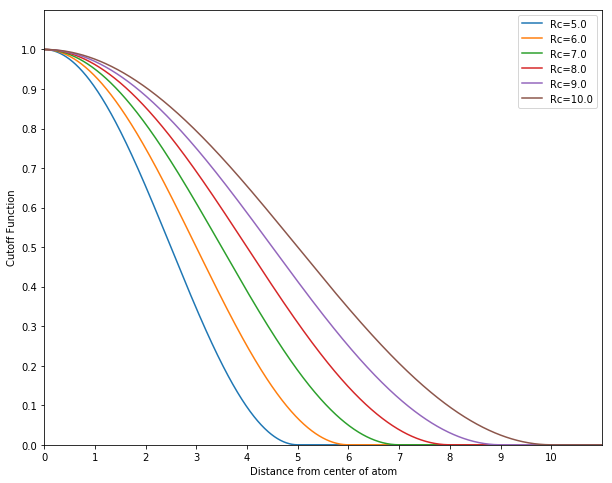

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Definition of the cutoff function
def fc(Rij, Rc):
    y_1 = 0.5*(np.cos(np.pi*Rij[Rij<=Rc]/Rc)+1)
    y_2 = Rij[Rij>Rc]*0
    y = np.concatenate((y_1,y_2))
    return y

# Define x
x = np.arange(0, 11, 0.01)

# Plot the function with different cutoff radii
Rc_range = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

fig = plt.figure(figsize=(10,8))

for Rc in Rc_range:
    plt.plot(x, fc(x,Rc), label=f'Rc={Rc}')

plt.axis([0, 11, 0, 1.1])
plt.xticks(range(11))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Distance from center of atom')
plt.ylabel('Cutoff Function')
plt.legend()
    
plt.show()

In [31]:
import ase.visualize
from ase.build import molecule

# Create the methanol molecule
methanol = molecule('CH3OH')

# ase.visualize.view(methanol, viewer="x3d")
max(methanol.get_all_distances().flatten())

Rc = 3.0

methanol.get_chemical_symbols()

all_dist = methanol.get_all_distances()
print('This is the distance matrix:')
print(all_dist)

dist_from_C = all_dist[0]
print('')
print('Distances from carbon atom to every other atoms:\n', dist_from_C)

G1_C = fc(dist_from_C, Rc).sum()
print('G1 for the carbon atom:', G1_C)

# Number of atoms in the molecules
natom = len(methanol.get_chemical_symbols())

# Definition of a vectorized cutoff function
def fc_vect(Rij, Rc):
    return np.where(Rij <= Rc, 0.5 * (np.cos(np.pi * Rij/Rc)+1), 0).sum(1)

# Calculate G1
G1 = fc_vect(all_dist, Rc)

print(G1)

def get_G2(Rij, eta, Rs):
     return np.exp(-eta*(Rij-Rs)**2) * fc(Rij, Rc)
    
# Set a list of six eta/Rs tuples
p = [(0.4, 0.2),(0.4, 0.5),(0.4, 1.0),(0.5, 2.0),(0.5, 3.0),(0.5, 4.0)]

# Compute the six G2 corresponding to the six eta/Rs tuples
G2 = np.zeros((natom, len(p)))
for i in range(natom):
    for j, (eta, Rs) in enumerate(p):
        G2[i,j] =  get_G2(all_dist[i], eta, Rs).sum()
    
print(G2)

This is the distance matrix:
[[0.         1.42294    1.08954037 1.94697215 1.09673412 1.09673412]
 [1.42294    0.         2.02014278 0.97000091 2.10034118 2.10034118]
 [1.08954037 2.02014278 0.         2.82138821 1.77449037 1.77449037]
 [1.94697215 0.97000091 2.82138821 0.         2.34989697 2.34989697]
 [1.09673412 2.10034118 1.77449037 2.34989697 0.         1.783544  ]
 [1.09673412 2.10034118 1.77449037 2.34989697 1.783544   0.        ]]

Distances from carbon atom to every other atoms:
 [0.         1.42294    1.08954037 1.94697215 1.09673412 1.09673412]
G1 for the carbon atom: 3.932941010789162
[3.93294101 2.95663053 2.67449883 2.26953861 2.73431001 2.73431001]
[[2.90037992 3.24700667 3.47570229 2.27238789 0.6691927  0.08430214]
 [2.0446415  2.23151944 2.34920562 1.69268583 0.68807299 0.1293389 ]
 [1.83068953 1.99200925 2.10126563 1.54894699 0.62110181 0.10909666]
 [1.70301353 1.78023681 1.73508754 1.07446204 0.45504078 0.10292628]
 [1.82391984 1.98854932 2.11180543 1.60866813 0.691

In [21]:
import pandas as pd
# import borisdee_kaggle_functions as bd

# Load all relevant files
raw_struct = pd.read_csv('../../data/input/structures.csv')
raw_charges = pd.read_csv('../../data/input/mulliken_charges.csv')
raw_test = pd.read_csv('../../data/input/test.csv')

# We need to free a bit of memory for Kaggle servers. Kudos to artgor for this function.
# raw_struct = bd.reduce_mem_usage(raw_struct)
# raw_charges = bd.reduce_mem_usage(raw_charges)
# raw_test = bd.reduce_mem_usage(raw_test)

In [22]:
raw_train = raw_struct[raw_struct['molecule_name'].isin(raw_charges['molecule_name'].unique())]
raw_train.reset_index(drop=True, inplace=True)
test = raw_struct[raw_struct['molecule_name'].isin(raw_test['molecule_name'].unique())]
display(raw_train.head(), test.head())

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


,molecule_name,atom_index,atom,x,y,z
12,dsgdb9nsd_000004,0,C,0.599539,0.000000,1.000000
13,dsgdb9nsd_000004,1,C,-0.599539,0.000000,1.000000
14,dsgdb9nsd_000004,2,H,-1.661639,0.000000,1.000000
15,dsgdb9nsd_000004,3,H,1.661639,0.000000,1.000000
79,dsgdb9nsd_000015,0,C,-0.014821,1.392412,0.005671


In [23]:
# Drop useless columns
columns_to_drop = ['molecule_name', 'atom_index', 'atom', 'x', 'y', 'z']
raw_train = raw_train.drop(columns_to_drop, axis=1)
test = test.drop(columns_to_drop, axis=1)

# Add Mulliken charges to training set
raw_train['mulliken_charge'] = raw_charges['mulliken_charge']

# Create train and cv sets
train = raw_train.sample(frac=0.80, random_state=2019)
cv = raw_train.drop(train.index)

print('Shape of train set:', train.shape)
print('Shape of cv set:', cv.shape)

Shape of train set: (1226830, 1)
Shape of cv set: (306707, 1)


In [13]:
# df1 = pd.DataFrame(train['mulliken_charge'])
# df2 = pd.DataFrame(cv['mulliken_charge'])

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

target = 'mulliken_charge'

# Test set 
X_test = test

# Train set
X_train = train.drop(target, axis=1)    
y_train = train[target]

# CV set
X_cv = cv.drop(target, axis=1)
y_cv = cv[target]

In [19]:
train.shape

(1226830, 1)

In [18]:
X_train.shape, y_train.shape

((1226830, 0), (1226830,))

In [ ]:
# Extra Tree
reg = ExtraTreesRegressor(n_estimators=8, max_depth=20, n_jobs=4)

print(X_train.shape, y_train.shape)

reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
pred_cv = reg.predict(X_cv)
pred_test = reg.predict(X_test)

print('MAE on train set: %.2E.' %mean_absolute_error(y_train, pred_train)) 
print('MAE on cv set: %.2E.' %mean_absolute_error(y_cv, pred_cv))
print('')

# Plotiplot
plt.plot(y_cv,pred_cv,'o')
plt.plot([-1,1],[-1,1]) # perfect fit line
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()